In [2]:
import numpy as np

In [59]:
from torch.nn import GaussianNLLLoss

In [2]:
"./multi_NN_v2/membership_specie_1_model_0_one_hot_train.npy"
"./multi_NN_v2/specie_1_model_no_0_predictions_train_complete.npy"
"./multi_NN_v2/specie_1_true_train_complete.npy"
"./multi_NN_v2/specie_1_true_test.npy"
"./multi_NN_v2/specie_1_model_no_8_predictions_test.npy"

#for specie in [1,6,7,8]:

'./multi_NN_v2/specie_1_model_no_8_predictions_test.npy'

In [3]:
a = np.load("./multi_NN_v2/membership_specie_1_model_0_one_hot_train.npy")
b = np.load("./multi_NN_v2/specie_1_model_no_0_predictions_train_complete.npy")
c = np.load("./multi_NN_v2/specie_1_true_train_complete.npy")
d = np.load("./multi_NN_v2/specie_1_true_test.npy")
e = np.load("./multi_NN_v2/specie_1_model_no_1_predictions_test.npy")

In [4]:
f = np.load("./multi_kernel_v2/specie_1_model_no_10_test_pred.npy")
g = np.load("./multi_ridge_v2/1H_test_reference_shifts.npy")#_reference_shifts.npy_shifts.npy.npy")

In [3]:
from sklearn.metrics import mean_squared_error

In [6]:
mean_squared_error(f,g,squared=False)

3.2639577225177536

In [7]:
b.shape

(134692,)

In [148]:
np.around(17 / 9)

2.0

In [8]:

results = {"v1":None,"v2":None}

#NN:
TRUTH_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_true_train_complete.npy"
TRUTH_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_true_test.npy"
FULL_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_model_no_{}_predictions_train_complete.npy"
FULL_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_model_no_{}_predictions_test.npy"
ONE_HOT_IDENTIFIER = "./multi_NN_{}/membership_specie_{}_model_{}_one_hot_train.npy"


"""
TRUTH_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_true_train_complete.npy"
TRUTH_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_true_test.npy"
FULL_TRAIN_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_full_test_pred.npy"
FULL_TEST_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_test_pred.npy"
ONE_HOT_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_one_hot.npy"
"""



for degree in ["v1","v2"]:
    train_true = {}
    test_true = {}
    pred_train = {}
    pred_test = {}
    one_hot = {}
    means_train = {}
    means_test = {}
    residuals_train = {}
    residuals_test = {}
   
    
    for specie in [1,6,7,8]:
        train_true[specie] = np.load(TRUTH_TRAIN_IDENTIFIER.format(degree,specie))
        test_true[specie] = np.load(TRUTH_TEST_IDENTIFIER.format(degree,specie))
        pred_train[specie] = []
        pred_test[specie] = []
        one_hot[specie] = []
        for model in range(16):
            pred_train[specie].append(np.load(FULL_TRAIN_IDENTIFIER.format(degree,specie,model)))
            pred_test[specie].append(np.load(FULL_TEST_IDENTIFIER.format(degree,specie,model)))
            one_hot[specie].append(np.load(ONE_HOT_IDENTIFIER.format(degree,specie,model)))
        
       
        pred_train[specie] = np.vstack(pred_train[specie]).T
        pred_test[specie] = np.vstack(pred_test[specie]).T
        one_hot[specie] = np.vstack(one_hot[specie]).T
        means_train[specie] = np.mean(pred_train[specie],axis=1)
        means_test[specie] = np.mean(pred_test[specie],axis=1)
        #residuals_train[specie] = np.abs(train_true[specie]- means[specie])
    
    results[degree] = {"train_true":train_true,"test_true":test_true,"means_train":means_train,"means_test":means_test,"pred_train":pred_train,"pred_test":pred_test,"one_hot":one_hot}

In [9]:
np.abs(results["v1"]["pred_train"][1] - results["v1"]["means_train"][1].reshape(-1,1))

array([[0.07545509, 0.13531934, 0.10904534, ..., 0.01391235, 0.09623394,
        0.03887014],
       [0.07540607, 0.13528755, 0.10903713, ..., 0.01380014, 0.0961101 ,
        0.03891771],
       [0.07540404, 0.13528233, 0.1090202 , ..., 0.01377803, 0.09612086,
        0.0389397 ],
       ...,
       [0.07858664, 0.31956719, 0.29038829, ..., 0.05152736, 0.09751837,
        0.03976812],
       [0.07841407, 0.3196044 , 0.29033115, ..., 0.05155682, 0.09757243,
        0.03973988],
       [0.07865021, 0.31953269, 0.29041752, ..., 0.05150369, 0.09751635,
        0.0398359 ]])

In [10]:
import matplotlib.pyplot as plt

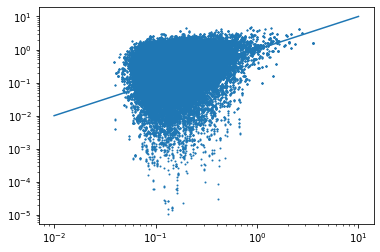

In [11]:
plt.scatter(np.std(results["v1"]["pred_train"][1],axis=1),np.abs(results["v1"]["means_train"][1]-results["v1"]["train_true"][1]),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1))
plt.yscale("log")
plt.xscale("log")


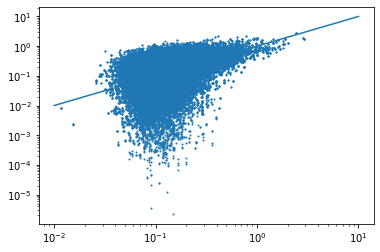

In [12]:
plt.scatter(np.std(results["v2"]["pred_train"][1],axis=1),np.abs(results["v2"]["means_train"][1]-results["v2"]["train_true"][1]),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1))
plt.yscale("log")
plt.xscale("log")

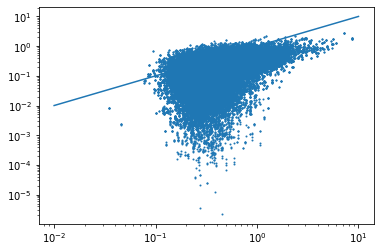

In [13]:
plt.scatter(3*np.std(results["v2"]["pred_train"][1],axis=1),np.abs(results["v2"]["means_train"][1]-results["v2"]["train_true"][1]),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1))
plt.yscale("log")
plt.xscale("log")

In [14]:
from math import comb
def bernoulli(n,k,p):
    return comb(n,k) * p ** k * (1-p) ** (n-k)

plt.hist(np.sum(one_hot,axis=1),density=True)
plt.scatter([i for i in range(5,17)],[bernoulli(16,i,0.75) for i in range(5,17)],color="tab:red",)

AxisError: axis 1 is out of bounds for array of dimension 0

In [15]:
probas = [bernoulli(16,i,0.75) for i in range(5,17)]

In [16]:
for i in range(10,17): print(i)

10
11
12
13
14
15
16


In [ ]:
alpha_as_func_of_points = []

for i in range

In [80]:
np.sum(np.sum(one_hot,axis=1) < 11)

24513

NameError: name 'commitee_pred' is not defined

In [93]:
(masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])**2

masked_array(data=[0.07249109, 0.07249792, 0.9043318 , ..., 0.12076808,
                   0.12079035, 0.1207693 ],
             mask=False,
       fill_value=1e+20)

5.407140210206114

In [85]:
masked_commitee_pred[smaller5].var(axis=1)

masked_array(data=[0.00504775, 0.00504775, 0.01604163, ..., 0.00526478,
                   0.00526449, 0.00526487],
             mask=False,
       fill_value=1e+20)

In [4]:
def neglog_likelihood_gamma(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars + beta **2)**(gamma+2) )))
    return -ll

def neglog_likelihood_gamma_2(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars)**(gamma+2)+ beta**2)) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars)**(gamma+2) + beta **2)))
    return -ll

def neglog_likelihood_gamma_3(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    gamma = x[1]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars)**(gamma+2))))
    return -ll

NameError: name 'yvars_data' is not defined

In [ ]:
plt.scatter(np.std(results["v2"]["pred_train"][1],axis=1),np.abs(results["v2"]["means_train"][1]-results["v2"]["train_true"][1]),s=1)

In [5]:
from scipy.optimize import minimize



commitee_pred = np.load("1H_commitee_prediction.npy")
reference = np.load("1H_reference_shifts.npy")
one_hot = np.load("1H_train_binary_1_hot_N_sample_M_models.npy")
smaller5 = np.sum(one_hot,axis=1) < 11
masked_commitee_pred = np.ma.masked_array(data=commitee_pred,mask=one_hot)
alpha_ref = np.sqrt(np.mean((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])**2/masked_commitee_pred[smaller5].var(ddof=1,axis=1)))

yvars_data = masked_commitee_pred[smaller5].var(ddof=1,axis=1)
ymeans_data = masked_commitee_pred[smaller5].mean(axis=1)
ytrue_data = reference[smaller5]

def neglog_likelihood(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*yvars) - (ymeans-ytrue)**2/(2*(alpha**2 * yvars)))
    return -ll


In [6]:
minimize(neglog_likelihood_gamma_2,x0=np.array([1.,1.,1.]))

NameError: name 'neglog_likelihood_gamma_2' is not defined

In [7]:
neglog_likelihood(np.array([100.]))

2.9412796508614267

In [8]:
minimize(neglog_likelihood,x0=np.array([1.]))

      fun: 0.5223679479352333
 hess_inv: array([[14.41370751]])
      jac: array([-1.74343586e-06])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([5.40711458])

We find the closed form solution

In [7]:
from scipy.optimize import minimize

In [196]:
neglog_likelihood_gamma(np.array([100.,0.,1.]))

834.4967802030027

In [53]:
minimize(neglog_likelihood_gamma_3,x0=np.array([1.,-1.]))

      fun: 0.40484529204736025
 hess_inv: array([[84.59082015, 10.21219635],
       [10.21219635,  1.38444868]])
      jac: array([-8.30367208e-06,  6.90668821e-06])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 1.70574255, -1.60818739])

In [38]:
minimize(neglog_likelihood_gamma_2,x0=np.array([1.,1.,1.]))

      fun: 0.3995387136582517
 hess_inv: array([[98.81484932,  4.10141489, 45.23511524],
       [ 4.10141489,  1.14893892,  5.06222957],
       [45.23511524,  5.06222957, 33.39513965]])
      jac: array([ 2.33575702e-06,  9.35792923e-06, -5.48735261e-06])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 28
     njev: 33
   status: 0
  success: True
        x: array([ 2.51258894,  0.38170234, -1.09009478])

In [39]:
minimize(neglog_likelihood_gamma,x0=np.array([1.,1.,1.]))

      fun: 0.39954101101193207
 hess_inv: array([[53.18059379, 12.22762613, 31.12163993],
       [12.22762613, 12.85136839, 27.17693058],
       [31.12163993, 27.17693058, 58.73576882]])
      jac: array([-2.75671482e-07, -9.94652510e-07,  1.26287341e-06])
  message: 'Optimization terminated successfully.'
     nfev: 188
      nit: 35
     njev: 47
   status: 0
  success: True
        x: array([ 2.58862742,  0.33212022, -1.13984364])

In [21]:
def rescale_var(var,alpha,beta,gamma):
    return np.sqrt((alpha**2*var + beta**2)**(gamma+2))

In [23]:
commitee_pred = np.load("1H_commitee_prediction.npy")
reference = np.load("1H_reference_shifts.npy")
one_hot = np.load("1H_train_binary_1_hot_N_sample_M_models.npy")
smaller5 = np.sum(one_hot,axis=1) < 11
alpha_ref = np.sqrt(np.mean((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])**2/masked_commitee_pred[smaller5].var(ddof=1,axis=1)))

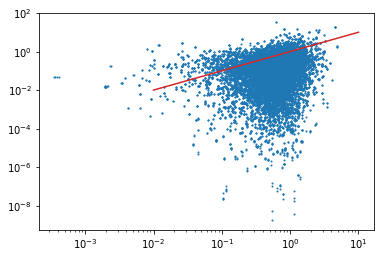

In [24]:
plt.scatter(5.4*masked_commitee_pred[smaller5].std(axis=1),np.abs((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])**2),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")

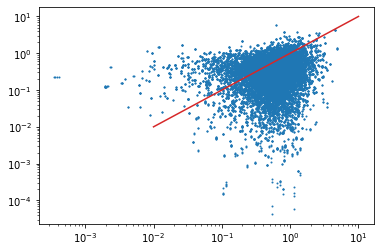

In [25]:
plt.scatter(5.4*masked_commitee_pred[smaller5].std(axis=1),np.abs((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")

In [ ]:
# x: array([ 2.58862742,  0.33212022, -1.13984364])

In [11]:
errors = masked_commitee_pred[smaller5].var(axis=1,ddof=1)
plt.scatter(rescale_var(errors,2.58862742,0.33212022,-1.13984364),np.abs((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")

NameError: name 'rescale_var' is not defined

(0.0001, 10)

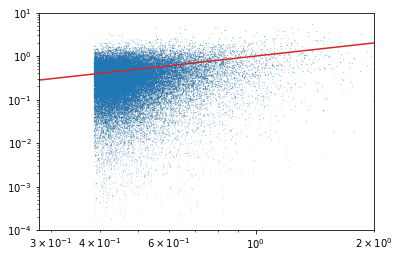

In [68]:
errors = masked_commitee_pred.var(axis=1,ddof=1)
plt.scatter(rescale_var(errors,2.58862742,0.33212022,-1.13984364),np.abs((masked_commitee_pred.mean(axis=1)-reference)),s=0.001)
plt.plot(np.logspace(-2,1),np.logspace(-2,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.28,2)
plt.ylim(1e-04,10)

In [137]:
from matplotlib import pyplot as plt

In [135]:
from scipy.optimize import minimize



commitee_pred = results["v2"]["pred_train"][1]
reference = results["v2"]["train_true"][1]
one_hot = results["v2"]["one_hot"][1]
smaller5 = np.sum(one_hot,axis=1) < 11
masked_commitee_pred = np.ma.masked_array(data=commitee_pred,mask=one_hot)
alpha_ref = np.sqrt(np.mean((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])**2/masked_commitee_pred[smaller5].var(ddof=1,axis=1)))

yvars_data = masked_commitee_pred[smaller5].var(ddof=1,axis=1)
ymeans_data = masked_commitee_pred[smaller5].mean(axis=1)
ytrue_data = reference[smaller5]

In [139]:
def neglog_likelihood(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*yvars) - (ymeans-ytrue)**2/(2*(alpha**2 * yvars)))
    return -ll


def neglog_likelihood_gamma(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars + beta **2)**(gamma+2) )))
    return -ll

#v2: params:




def neglog_likelihood_gamma_2(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars)**(gamma+2)+ beta**2)) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars)**(gamma+2) + beta **2)))
    return -ll

def neglog_likelihood_gamma_3(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    gamma = x[1]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * yvars)**(gamma+2))))
    return -ll

def neglog_likelihood_gamma_4(x,yvars=yvars_data,ymeans=ymeans_data,ytrue=ytrue_data):
    alpha = x[0]
    beta = x[1]
    #beta = x[1]
    #gamma = x[2]
    ll = np.mean(-0.5*np.log(np.pi*((alpha**2*yvars) + beta**2)) - (ymeans-ytrue)**2/(2*(((alpha**2 * yvars)+ beta **2))))
    return -ll

def rescale_var_2(var,alpha,beta,gamma):
    return np.sqrt((alpha**2*var)**(gamma+2) + beta**2)

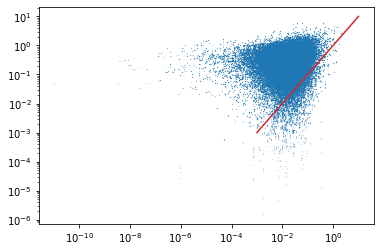

In [22]:
errors = masked_commitee_pred.var(axis=1,ddof=1)
plt.scatter(errors,np.abs((masked_commitee_pred.mean(axis=1)-reference)),s=0.01)
plt.plot(np.logspace(-3,1),np.logspace(-3,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")
#plt.xlim(1,100)
#plt.ylim(1e-04,300)

(0.0001, 300)

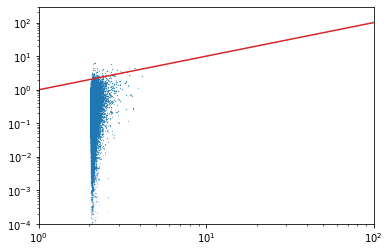

In [140]:
errors = masked_commitee_pred.var(axis=1,ddof=1)
plt.scatter(rescale_var_2(errors, 2.82506317,  2.05308354, -1.07379308 ),np.abs((masked_commitee_pred.mean(axis=1)-reference)),s=0.01)
plt.plot(np.logspace(-2,3),np.logspace(-2,3),c="tab:red")
plt.yscale("log")
plt.xscale("log")
plt.xlim(1,100)
plt.ylim(1e-04,300)

(0.0001, 10)

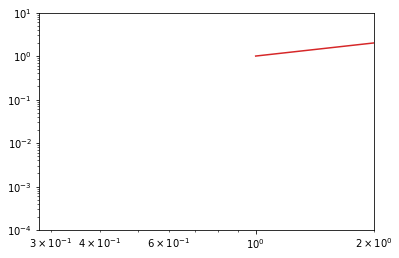

In [27]:
errors = masked_commitee_pred.var(axis=1,ddof=1)
plt.scatter(rescale_var_2(errors[smaller5],2.82506317,  2.05308354, -1.07379308),np.abs((masked_commitee_pred.mean(axis=1)-reference))[smaller5],s=0.01)
plt.plot(np.logspace(0,2),np.logspace(0,2),c="tab:red")
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.28,2)
plt.ylim(1e-04,10)

In [36]:
from scipy.optimize import basinhopping

In [97]:
bounds = [(0.001,100.), (0.01, 100.), (-10., 10.)]

In [11]:
basinhopping(neglog_likelihood_gamma_2,x0=np.array([1.,1.,1.]))

NameError: name 'basinhopping' is not defined

In [20]:
minimize(neglog_likelihood,x0=np.array([1.]))

      fun: 0.8695339287971146
 hess_inv: array([[12.95228581]])
      jac: array([-3.05473804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([5.10742353])

In [21]:
minimize(neglog_likelihood_gamma_4,x0=np.array([1.,0.]))

      fun: 0.7145129484960685
 hess_inv: array([[30.0613867 , -2.54457387],
       [-2.54457387,  0.53029003]])
      jac: array([-5.73694706e-07, -1.26659870e-07])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 15
     njev: 19
   status: 0
  success: True
        x: array([2.1995187 , 0.54911996])

In [22]:
minimize(neglog_likelihood,x0=np.array([1.]))

      fun: 0.8695339287971146
 hess_inv: array([[12.95228581]])
      jac: array([-3.05473804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([5.10742353])

In [23]:
minimize(neglog_likelihood_gamma_3,x0=np.array([1.,-1.]))

      fun: 0.7180497410069153
 hess_inv: array([[63.11274308,  6.83373855],
       [ 6.83373855,  1.10370673]])
      jac: array([ 3.72529030e-08, -5.43892384e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([ 2.44203651, -1.62334734])

In [35]:
minimize(neglog_likelihood_gamma_2,x0=np.array([1.,1.,1.]))["x"]

array([ 2.1666222 ,  0.49662761, -1.233789  ])

In [17]:
minimize(neglog_likelihood_gamma,x0=np.array([1.,1.,1.]))

      fun: 0.3282352616255311
 hess_inv: array([[95.58059606, 30.04564751, 56.72150577],
       [30.04564751, 14.24463887, 24.34867136],
       [56.72150577, 24.34867136, 42.89448403]])
      jac: array([-1.97440386e-07, -1.35600567e-06,  9.68575478e-07])
  message: 'Optimization terminated successfully.'
     nfev: 224
      nit: 43
     njev: 56
   status: 0
  success: True
        x: array([ 2.00352551,  0.19882436, -1.30232118])

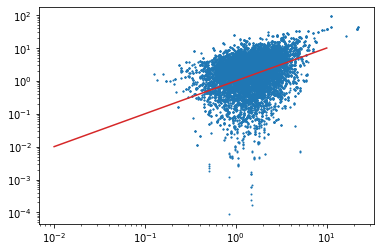

In [116]:
plt.scatter(masked_commitee_pred[smaller5].std(axis=1),np.abs((masked_commitee_pred[smaller5].mean(axis=1)-reference[smaller5])),s=1)
plt.plot(np.logspace(-2,1),np.logspace(-2,1),c="tab:red")
plt.yscale("log")
plt.xscale("log")

In [28]:
rescale_var(errors,2.58862742,0.33212022,-1.13984364) 

masked_array(data=[0.47452430070453355, 0.47450810721054476,
                   0.4745204888602984, ..., 0.4101925103613436,
                   0.4101847144185199, 0.41019527118494065],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [14]:
results["v1"]["pred_train"][1]

array([[18.59039914, 18.65026338, 18.62398939, ..., 18.50103169,
        18.61117799, 18.4760739 ],
       [18.59076842, 18.6506499 , 18.62439948, ..., 18.50156221,
        18.61147245, 18.47644463],
       [18.59074837, 18.65062666, 18.62436453, ..., 18.5015663 ,
        18.61146519, 18.47640463],
       ...,
       [28.97528875, 28.7343082 , 29.34426368, ..., 29.10540275,
        28.95635702, 29.01410727],
       [28.97535831, 28.73416798, 29.34410354, ..., 29.1053292 ,
        28.95619995, 29.01403251],
       [28.97526769, 28.73438521, 29.34433542, ..., 29.10542159,
        28.95640155, 29.014082  ]])

In [6]:
results["v1"]["one_hot"][1]

array([[ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True, False,  True],
       ...,
       [False,  True, False, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True]])

In [7]:
masked_data[0]

NameError: name 'masked_data' is not defined

In [134]:
results["v1"]["pred_train"][1][at_least_5]

array([[25.56566676, 25.80387562, 26.1461332 , ..., 25.56757337,
        25.36534673, 25.83320965],
       [25.56562752, 25.80402077, 26.14578587, ..., 25.56826825,
        25.3653084 , 25.83355888],
       [25.56572055, 25.80387387, 26.14615138, ..., 25.56766468,
        25.36539483, 25.83322793],
       ...,
       [23.88370755, 23.80358532, 23.85518202, ..., 23.84139776,
        23.77877264, 23.63310141],
       [23.07604488, 22.96260893, 22.85789514, ..., 23.10004013,
        22.69891725, 22.83079989],
       [23.07619821, 22.96265473, 22.85797487, ..., 23.10020363,
        22.69899634, 22.83092983]])

In [110]:
#get all those points that are at least absent from 5 models


25767

In [135]:
at_least_5 = (16 - np.sum(results["v1"]["one_hot"][1],axis=1)) > 5
inverted_one_hot = results["v1"]["one_hot"][1][at_least_5]

masked_data = np.ma.masked_array(data=results["v1"]["pred_train"][1][at_least_5],mask=inverted_one_hot)

In [130]:
np.ma.std(masked_data,axis=1).data

array([0.17126007, 0.17128784, 0.17126036, ..., 0.12701497, 0.19518773,
       0.19520695])

In [129]:
np.std(results["v1"]["pred_train"][1][at_least_5],axis=1)

array([0.2041144 , 0.20408072, 0.20410867, ..., 0.12944991, 0.17849065,
       0.17849937])

In [116]:
results["v1"]["pred_train"][1].shape

(134692, 16)

In [117]:
inverted_one_hot.shape

(25767, 16)

In [118]:
at_least_5.shape

(134692,)

In [45]:
results["v2"]["te"]

{'train_true': {1: array([18.39, 18.39, 18.39, ..., 29.29, 29.29, 29.29]),
  6: array([-1.11422813, -1.11422813, -1.11422813, ..., -1.11422813,
         -1.11422813, -1.11422813])},
 'test_true': {1: array([25.97, 25.97, 25.97, ..., 23.13, 23.13, 23.13]),
  6: array([42.16, 42.16, 42.16, ..., 27.3 , 27.3 , 27.3 ])},
 'pred_train': {1: array([[18.32890649, 18.1396572 , 18.46484448, ..., 18.2680678 ,
          18.27901386, 18.28285448],
         [18.3289414 , 18.1397208 , 18.46490925, ..., 18.26811355,
          18.27907394, 18.28289723],
         [18.32899895, 18.13976985, 18.46496161, ..., 18.26817097,
          18.27912312, 18.2829462 ],
         ...,
         [29.0940906 , 29.22756977, 29.25466736, ..., 29.0979574 ,
          29.25260292, 29.22238075],
         [29.09403322, 29.22757   , 29.25463434, ..., 29.09794328,
          29.25254919, 29.22232945],
         [29.09410237, 29.22758567, 29.25466916, ..., 29.09796735,
          29.25260588, 29.22240147]]),
  6: array([[  3.96101675

In [95]:
specie=6
train_pred_mat = []
test_pred_mat = []
test_true = []
train_mean = []
test_mean = []
train_std = []
test_std = []

for order in ["v1","v2"]:
    train_pred_mat.append(results[order]["pred_train"][specie])
    test_pred_mat.append(results[order]["pred_test"][specie])
    test_true.append(results[order]["test_true"][specie])
    train_mean.append(np.mean(results[order]["pred_train"][specie],axis=1))
    test_mean.append(np.mean(results[order]["pred_test"][specie],axis=1))
    train_std.append(np.std(results[order]["pred_train"][specie],axis=1))
    test_std.append(np.std(results[order]["pred_test"][specie],axis=1))   

test_final = (1/(test_std[1]**2) + 1/(test_std[0]**2))**-1 * (1/(test_std[0]**2) * test_mean[0] + 1/(test_std[1]**2) * test_mean[1])

In [89]:
results["v1"]["pred_train"][specie].shape

(134692, 16)

In [90]:
train_std[1]

array([0.39088323, 0.39088095, 0.39088156, ..., 0.50558773, 0.50558712,
       0.50558754])

In [68]:
test_final


array([26.49065939, 26.49068945, 26.49066843, ..., 23.71452636,
       23.71389533, 23.71456647])

In [69]:
test_true

[array([25.97, 25.97, 25.97, ..., 23.13, 23.13, 23.13]),
 array([25.97, 25.97, 25.97, ..., 23.13, 23.13, 23.13])]

In [64]:
train_true

{1: array([18.39, 18.39, 18.39, ..., 29.29, 29.29, 29.29]),
 6: array([-1.11422813, -1.11422813, -1.11422813, ..., -1.11422813,
        -1.11422813, -1.11422813])}

In [96]:
mean_squared_error(test_mean[0],test_true[0],squared=False)

50.65007036578378

In [92]:
mean_squared_error(test_final,test_true[0],squared=False)

3.2339660069133225

In [32]:
test_true

array([42.16, 42.16, 42.16, ..., 27.3 , 27.3 , 27.3 ])

In [18]:
teststring.format("alpha")

'a_alpha'

In [18]:
import seaborn as sns

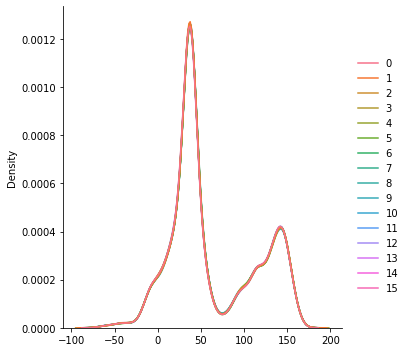

In [20]:
sns.displot(results["v2"]["pred_test"][6],kind="kde")

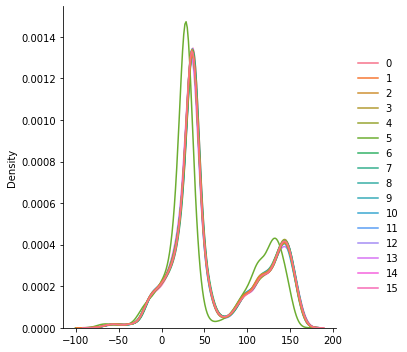

In [143]:
sns.displot(results["v1"]["pred_test"][specie],kind="kde")

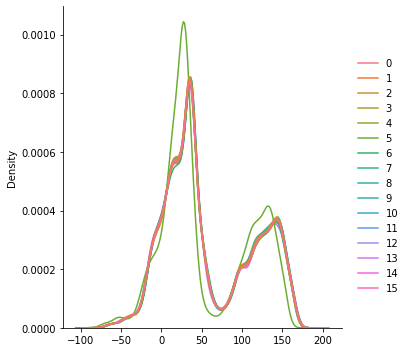

In [139]:
sns.displot(results["v1"]["pred_train"][specie],kind="kde")

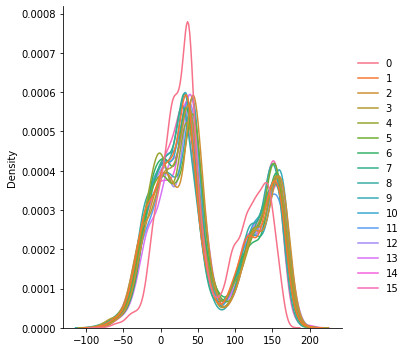

In [140]:
sns.displot(results["v2"]["pred_train"][specie],kind="kde")

In [ ]:
#1
#v1 rescale_2 params x: [ 2.1666222 ,  0.49662761, -1.233789  ]
#v2 rescale_2 params x: array([ 1.93856492,  0.30912756, -1.21839927])

In [118]:
results = {"v1":None,"v2":None}

#NN:
TRUTH_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_true_train_complete.npy"
TRUTH_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_true_test.npy"
FULL_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_model_no_{}_predictions_train_complete.npy"
FULL_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_model_no_{}_predictions_test.npy"
ONE_HOT_IDENTIFIER = "./multi_NN_{}/membership_specie_{}_model_{}_one_hot_train.npy"


"""
TRUTH_TRAIN_IDENTIFIER = "./multi_NN_{}/specie_{}_true_train_complete.npy"
TRUTH_TEST_IDENTIFIER = "./multi_NN_{}/specie_{}_true_test.npy"
FULL_TRAIN_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_full_test_pred.npy"
FULL_TEST_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_test_pred.npy"
ONE_HOT_IDENTIFIER = "./multi_kernel_{}/specie_{}_model_no_{}_one_hot.npy"
"""



for degree in ["v1","v2"]:
    train_true = {}
    test_true = {}
    pred_train = {}
    pred_test = {}
    one_hot = {}
    means_train = {}
    means_test = {}
    residuals_train = {}
    residuals_test = {}
   
    
    for specie in [1,6,7,8]:
        train_true[specie] = np.load(TRUTH_TRAIN_IDENTIFIER.format(degree,specie))
        test_true[specie] = np.load(TRUTH_TEST_IDENTIFIER.format(degree,specie))
        pred_train[specie] = []
        pred_test[specie] = []
        one_hot[specie] = []
        for model in range(16):
            pred_train[specie].append(np.load(FULL_TRAIN_IDENTIFIER.format(degree,specie,model)))
            pred_test[specie].append(np.load(FULL_TEST_IDENTIFIER.format(degree,specie,model)))
            one_hot[specie].append(np.load(ONE_HOT_IDENTIFIER.format(degree,specie,model)))
        
       
        pred_train[specie] = np.vstack(pred_train[specie]).T
        pred_test[specie] = np.vstack(pred_test[specie]).T
        one_hot[specie] = np.vstack(one_hot[specie]).T
        means_train[specie] = np.mean(pred_train[specie],axis=1)
        means_test[specie] = np.mean(pred_test[specie],axis=1)
        #residuals_train[specie] = np.abs(train_true[specie]- means[specie])
    
    results[degree] = {"train_true":train_true,"test_true":test_true,"means_train":means_train,"means_test":means_test,"pred_train":pred_train,"pred_test":pred_test,"one_hot":one_hot}

Import RR results

In [ ]:
"./multi_ridge_v2/

In [111]:
ridge_results["v1"]["pred_train"][1].type()

(134692, 16)

In [55]:
from sklearn.metrics import mean_squared_error

In [65]:
import torch

In [141]:
ridge_results = {"v1":None,"v2":None}
ridge_results["v1"] = {"pred_train":{},"pred_test":{},"one_hot":{},"means_train":{}}
ridge_results["v2"] = {"pred_train":{},"pred_test":{},"one_hot":{},"means_train":{}}


for v in [1]:
    for species in [1,6,7,8]:
        pred_test = []
        pred_train = []
        one_hot_train = []
        
        for i in range(16):
                pred_test.append(np.load("./multi_ridge_v{}/specie_{}_model_no_{}_test_pred.npy".format(v,species,i)))
                pred_train.append(np.load("./multi_ridge_v{}/specie_{}_model_no_{}_full_test_pred.npy".format(v,species,i)))
                one_hot_train.append(np.load("./multi_ridge_v{}/specie_{}_model_no_{}_one_hot.npy".format(v,species,i)))
        
        pred_test = np.vstack(pred_test).T
        pred_train = np.vstack(pred_train).T
        one_hot_train = np.vstack(one_hot_train).T
    
        ridge_results["v1"]["pred_train"][species] = pred_train    
        ridge_results["v1"]["pred_test"][species] = pred_test
        ridge_results["v1"]["one_hot"][species] = one_hot_train
        ridge_results["v1"]["means_train"][species] = np.mean(pred_train,axis=1)
        
for species, a_num in zip(["1H", "13C", "15N", "17O"],[1,6,7,8]):
    pred_test = np.load("./multi_ridge_v2/{}_test_commitee_prediction.npy".format(species))
    pred_train = np.load("./multi_ridge_v2/{}_commitee_prediction.npy".format(species))
    one_hot_train = np.load("./multi_ridge_v2/{}_train_binary_1_hot_N_sample_M_models.npy".format(species))
    
    ridge_results["v2"]["pred_train"][a_num] = pred_train    
    ridge_results["v2"]["pred_test"][a_num] = pred_test
    ridge_results["v2"]["one_hot"][a_num]= one_hot_train
    ridge_results["v2"]["means_train"][a_num] = np.mean(pred_train,axis=1)

params_RR = {}


for a_specie in [1,6,7,8]:
    
    int_param = {"alpha_v1":None,"alpha_v2":None,"beta_v1":None,"beta_v2":None,"gamma_v1":None,"gamma_v2":None}
    pred_v1 = np.copy(ridge_results["v1"]["pred_train"][a_specie])
    pred_v1_test = np.copy(ridge_results["v1"]["pred_test"][a_specie])
    mean_v1 = np.copy(ridge_results["v1"]["means_train"][a_specie])
    pred_v2 = np.copy(ridge_results["v2"]["pred_train"][a_specie])
    pred_v2_test = np.copy(ridge_results["v2"]["pred_test"][a_specie])
    mean_v2 = np.copy(ridge_results["v2"]["means_train"][a_specie])
    
    truth = np.copy(results["v1"]["train_true"][a_specie])
    truth_test = np.copy(results["v1"]["test_true"][a_specie])


    one_hot_v1 = np.copy(ridge_results["v1"]["one_hot"][a_specie])
    one_hot_v2 = np.copy(ridge_results["v2"]["one_hot"][a_specie])
    
    #def loss(ymeans,ytrue,ystd):
    
    smaller5_v1 = np.sum(one_hot_v1,axis=1) < 11
    smaller5_v2 = np.sum(one_hot_v2,axis=1) < 11
    masked_commitee_pred_v1 = np.ma.masked_array(data=pred_v1,mask=one_hot_v1)
    masked_commitee_pred_v2 = np.ma.masked_array(data=pred_v2,mask=one_hot_v2)

    ystd_data_v1 = masked_commitee_pred_v1[smaller5_v1].std(ddof=1,axis=1)
    ymeans_data_v1 = masked_commitee_pred_v1[smaller5_v1].mean(axis=1)
    ytrue_data_v1 = np.copy(truth[smaller5_v1])

    ystd_data_v2 = masked_commitee_pred_v2[smaller5_v2].std(ddof=1,axis=1)
    ymeans_data_v2 = masked_commitee_pred_v2[smaller5_v2].mean(axis=1)
    ytrue_data_v2 = np.copy(truth[smaller5_v2])
    
    def neglog_likelihood_gamma_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd + beta **2)**(gamma+2) )))
        return -ll
    
    def neglog_likelihood_gamma_v2(x,ystd=ystd_data_v2,ymeans=ymeans_data_v2,ytrue=ytrue_data_v2):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd + beta **2)**(gamma+2) )))
        return -ll

    def neglog_likelihood_gamma_2_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd**(gamma+2))+ beta**2)) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd**(gamma+2)) + beta **2)))
        return -ll

    def neglog_likelihood_gamma_2_v2(x,ystd=ystd_data_v2,ymeans=ymeans_data_v2,ytrue=ytrue_data_v2):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd**(gamma+2)+ beta**2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd**(gamma+2)) + beta **2)))
        return -ll

    def neglog_likelihood_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*ystd**2) - (ymeans-ytrue)**2/(2*(alpha**2 * ystd**2)))
        return -ll

    def neglog_likelihood_v2(x,ystd=ystd_data_v2,ymeans=ymeans_data_v2,ytrue=ytrue_data_v2):
        alpha = x[0]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*ystd**2) - (ymeans-ytrue)**2/(2*(alpha**2 * ystd**2)))
        return -ll

    def rescale_std_2_std(std,alpha,beta,gamma):
        return np.sqrt((alpha**2*std**(gamma+2) + beta**2))
    
    def rescale_std_3_std(std,alpha,beta,gamma):
        return np.sqrt((alpha**2*std**2 + beta**2)**(gamma+2) )

    alpha_v1,beta_v1,gamma_v1 = minimize(neglog_likelihood_gamma_2_v1,x0=np.array([1.,1.,1.]))["x"]
    alpha_v2,beta_v2,gamma_v2 = minimize(neglog_likelihood_gamma_2_v2,x0=np.array([1.,0.,0.]))["x"]
    
    int_param["alpha_v1"] = alpha_v1
    int_param["alpha_v2"] = alpha_v2
    int_param["beta_v1"] = beta_v1
    int_param["beta_v2"] = beta_v2
    int_param["gamma_v1"] = gamma_v1
    int_param["gamma_v2"] = gamma_v2
    
    params[a_specie] = int_param
    
    alpha_v1_3,beta_v1_3,gamma_v1_3 = minimize(neglog_likelihood_gamma_v1,x0=np.array([1.,1.,1.]))["x"]
    alpha_v2_3,beta_v2_3,gamma_v2_3 = minimize(neglog_likelihood_gamma_v2,x0=np.array([1.,1.,1.]))["x"]
    
    alpha_v1_2 = minimize(neglog_likelihood_v1,x0=np.array([1.]))["x"]
    alpha_v2_2 = minimize(neglog_likelihood_v2,x0=np.array([1.]))["x"]

    def combined_pred(pred_v1,pred_v2,a_v1,a_v2,b_v1,b_v2,g_v1,g_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = rescale_std_2_std(std_v1, a_v1, b_v1, g_v1)
        std_v2 = rescale_std_2_std(std_v2, a_v2, b_v2, g_v2)
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    def combined_pred_2(pred_v1,pred_v2,a_v1,a_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = a_v1 **2 * std_v1
        std_v2 = a_v2 **2 * std_v2
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    def combined_pred_3(pred_v1,pred_v2,a_v1,a_v2,b_v1,b_v2,g_v1,g_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = rescale_std_3_std(std_v1, a_v1, b_v1, g_v1)
        std_v2 = rescale_std_3_std(std_v2, a_v2, b_v2, g_v2)
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    print(pred_v1_test.std(axis=1,ddof=1).shape)
    print(pred_v1_test.std(axis=1,ddof=1).shape)
    print(truth_test.shape)
    LL_v1_test =  neglog_likelihood_clean(ystd=pred_v1_test.std(axis=1,ddof=1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test =  neglog_likelihood_clean(ystd=pred_v2_test.std(axis=1,ddof=1),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL: {}, v1".format(LL_v1_test))
    print("LL: {}, v2".format(LL_v2_test))
    # -print LL after rescaling
    LL_v1_test_r_a_b_g =  neglog_likelihood_clean(ystd=rescale_var_2_var(pred_v1_test.std(axis=1,ddof=1),alpha_v1,beta_v1,gamma_v1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_r_a_b_g =  neglog_likelihood_clean(ystd=rescale_var_2_var(pred_v2_test.std(axis=1,ddof=1),alpha_v2,beta_v2,gamma_v2),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL rescale a,b,g: {}, v1".format(LL_v1_test_r_a_b_g))
    print("LL rescale a,b,g: {}, v2".format(LL_v2_test_r_a_b_g))
    LL_v1_test_rescale_a =  neglog_likelihood_clean(ystd=alpha_v1_2**2*pred_v1_test.std(axis=1,ddof=1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_rescale_a =  neglog_likelihood_clean(ystd=alpha_v2_2**2*pred_v2_test.std(axis=1,ddof=1),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print(alpha_v2_2)
    print("LL rescale a: {}, v1".format(LL_v1_test_rescale_a))
    print("LL rescale a: {}, v2".format(LL_v2_test_rescale_a))    
    
    # -print LL worst guess
    RMSE_test_v1 = mean_squared_error(pred_v1_test.mean(axis=1),truth_test,squared=False)
    RMSE_test_v2 = mean_squared_error(pred_v2_test.mean(axis=1),truth_test,squared=False)
    LL_v1_test_worst =  neglog_likelihood_clean(ystd=RMSE_test_v1*np.ones(truth_test.shape),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_worst =  neglog_likelihood_clean(ystd=RMSE_test_v2*np.ones(truth_test.shape),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL worst: {}, v1".format(LL_v1_test_worst))
    print("LL worst: {}, v2".format(LL_v2_test_worst))
    

    LL_v1_test_clean =  neglog_likelihood_clean(ystd=np.abs(pred_v1_test.mean(axis=1)-truth_test)**2,ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_clean =  neglog_likelihood_clean(ystd=np.abs(pred_v2_test.mean(axis=1)-truth_test)**2,ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL best: {}, v1".format(LL_v1_test_clean))
    print("LL best: {}, v2".format(LL_v2_test_clean))
    # -print LL ideal guess
    # -print LL metric
    
    def dimensionless_coeff(LLworst,LLbest,LLactual):
        return max((LLworst-LLactual),0)/(LLworst-LLbest)*100
    
    print("v1 dimensionless alpha rescale {}".format(dimensionless_coeff(LL_v1_test_worst,LL_v1_test_clean,LL_v1_test_rescale_a)))
    print("v1 dimensionless alpha beta gamma rescale {}".format(dimensionless_coeff(LL_v1_test_worst,LL_v1_test_clean,LL_v1_test_r_a_b_g)))
    print("v2 dimensionless alpha rescale {}".format(dimensionless_coeff(LL_v2_test_worst,LL_v2_test_clean,LL_v2_test_rescale_a)))
    print("v2 dimensionless alpha beta gamma rescale {}".format(dimensionless_coeff(LL_v2_test_worst,LL_v2_test_clean,LL_v2_test_r_a_b_g)))

    final_pred = combined_pred(pred_v1_test,pred_v2_test,alpha_v1,alpha_v2,beta_v1,beta_v2,gamma_v1,gamma_v2)
    final_pred_test = combined_pred(pred_v2_test,pred_v2_test,alpha_v1,alpha_v1,beta_v1,beta_v1,gamma_v1,gamma_v1)
    final_pred_test_v1 = combined_pred(pred_v1_test,pred_v1_test,alpha_v1,alpha_v1,beta_v1,beta_v1,gamma_v1,gamma_v1)
    final_pred_3 = combined_pred_3(pred_v1_test,pred_v2_test,alpha_v1_3,alpha_v2_3,beta_v1_3,beta_v2_3,gamma_v1_3,gamma_v2_3)
    final_pred_test_3 = combined_pred_3(pred_v2_test,pred_v2_test,alpha_v1_3,alpha_v1_3,beta_v1_3,beta_v1_3,gamma_v1_3,gamma_v1_3)
    final_pred_only_alpha = combined_pred_2(pred_v1_test,pred_v2_test,alpha_v1_2,alpha_v2_2)
    final_pred_test_only_alpha = combined_pred_2(pred_v2_test,pred_v2_test,alpha_v1_2,alpha_v2_2)
    print("{} v1 acc: {}".format(a_specie, mean_squared_error(final_pred_test_v1,truth_test,squared=False)))
    print("{} v2 acc: {}".format(a_specie, mean_squared_error(final_pred_test,truth_test,squared=False)))
    print("{} combined acc: {}".format(a_specie, mean_squared_error(final_pred,truth_test,squared=False)))
    print("{} v2 acc only alpha: {}".format(a_specie, mean_squared_error(final_pred_test_only_alpha,truth_test,squared=False)))
    print("{} combined acc only alpha: {}".format(a_specie, mean_squared_error(final_pred_only_alpha,truth_test,squared=False)))
    print("{} 2nd v2 acc : {}".format(a_specie, mean_squared_error(final_pred_test_3,truth_test,squared=False)))
    print("{} 2nd combined acc : {}".format(a_specie, mean_squared_error(final_pred_3,truth_test,squared=False)))

(35289,)
(35289,)
(35289,)
LL: 4.180561979657982, v1
LL: 0.6748133910489671, v2
LL rescale a,b,g: 1.675158294771339, v1
LL rescale a,b,g: 1.084551583670042, v2
[5.40711449]
LL rescale a: 1.9672662521630964, v1
LL rescale a: 1.2232918598944664, v2
LL worst: 1.6379913768573948, v1
LL worst: 0.8993529909822635, v2
LL best: 1.1335703012255427, v1
LL best: 0.370877952609018, v2
v1 dimensionless alpha rescale 0.0
v1 dimensionless alpha beta gamma rescale 0.0
v2 dimensionless alpha rescale 0.0
v2 dimensionless alpha beta gamma rescale 0.0
1 v1 acc: 1.2157143322637558
1 v2 acc: 0.47772337725071135
1 combined acc: 0.5275856696714548
1 v2 acc only alpha: 0.4777233772507114
1 combined acc only alpha: 0.478114090334682
1 2nd v2 acc : 0.4777233772507114
1 2nd combined acc : 0.6197734449583366
(31446,)
(31446,)
(31446,)
LL: 72.41791164436242, v1
LL: 9.639713658197868, v2
LL rescale a,b,g: 738.1056577030489, v1
LL rescale a,b,g: 4.482301280081628, v2
[4.4158463]
LL rescale a: 4.511079829268523, v1
LL

In [76]:
np.sqrt(38.8393497)

6.232122407334439

In [123]:
params = {}



for a_specie in [1,6,7,8]:
    int_param = {"alpha_v1":None,"alpha_v2":None,"beta_v1":None,"beta_v2":None,"gamma_v1":None,"gamma_v2":None}
    pred_v1 = np.copy(results["v1"]["pred_train"][a_specie])
    pred_v1_test = np.copy(results["v1"]["pred_test"][a_specie])
    mean_v1 = np.copy(results["v1"]["means_train"][a_specie])
    pred_v2 = np.copy(results["v2"]["pred_train"][a_specie])
    pred_v2_test = np.copy(results["v2"]["pred_test"][a_specie])
    mean_v2 = np.copy(results["v2"]["means_train"][a_specie])
    truth = np.copy(results["v1"]["train_true"][a_specie])
    truth_test = np.copy(results["v1"]["test_true"][a_specie])


    one_hot_v1 = np.copy(results["v1"]["one_hot"][a_specie])
    one_hot_v2 = np.copy(results["v2"]["one_hot"][a_specie])
    smaller5_v1 = np.sum(one_hot_v1,axis=1) < 11
    smaller5_v2 = np.sum(one_hot_v2,axis=1) < 11
    masked_commitee_pred_v1 = np.ma.masked_array(data=pred_v1,mask=one_hot_v1)
    masked_commitee_pred_v2 = np.ma.masked_array(data=pred_v2,mask=one_hot_v2)

    ystd_data_v1 = masked_commitee_pred_v1[smaller5_v1].std(ddof=1,axis=1)
    ymeans_data_v1 = masked_commitee_pred_v1[smaller5_v1].mean(axis=1)
    ytrue_data_v1 = np.copy(truth[smaller5_v1])

    ystd_data_v2 = masked_commitee_pred_v2[smaller5_v2].std(ddof=1,axis=1)
    ymeans_data_v2 = masked_commitee_pred_v2[smaller5_v2].mean(axis=1)
    ytrue_data_v2 = np.copy(truth[smaller5_v2])
    
    def neglog_likelihood_gamma_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd + beta **2)**(gamma+2) )))
        return -ll
    
    def neglog_likelihood_gamma_v2(x,ystd=ystd_data_v2,ymeans=ymeans_data_v2,ytrue=ytrue_data_v2):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd + beta**2)**(gamma+2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd + beta **2)**(gamma+2) )))
        return -ll

    def neglog_likelihood_gamma_2_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd**(gamma+2))+ beta**2)) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd**(gamma+2)) + beta **2)))
        return -ll

    def neglog_likelihood_gamma_2_v2(x,ystd=ystd_data_v2,ymeans=ymeans_data_v2,ytrue=ytrue_data_v2):
        alpha = x[0]
        beta = x[1]
        gamma = x[2]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*((alpha**2*ystd**(gamma+2)+ beta**2))) - (ymeans-ytrue)**2/(2*((alpha**2 * ystd**(gamma+2)) + beta **2)))
        return -ll

    def neglog_likelihood_v1(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*ystd) - (ymeans-ytrue)**2/(2*(alpha**2 * ystd)))
        return -ll

    def neglog_likelihood_v2(x,ystd=ystd_data_v1,ymeans=ymeans_data_v1,ytrue=ytrue_data_v1):
        alpha = x[0]
        #beta = x[1]
        #gamma = x[2]
        ll = np.mean(-0.5*np.log(np.pi*(alpha**2)*ystd) - (ymeans-ytrue)**2/(2*(alpha**2 * ystd)))
        return -ll

    def rescale_std_2_std(std,alpha,beta,gamma):
        return np.sqrt((alpha**2*std**(gamma+2)) + beta**2)
    
    def rescale_std_3_std(std,alpha,beta,gamma):
        return np.sqrt((alpha**2*std**2 + beta**2)**(gamma+2) )

    alpha_v1,beta_v1,gamma_v1 = minimize(neglog_likelihood_gamma_2_v1,x0=np.array([1.,1.,1.]))["x"]
    alpha_v2,beta_v2,gamma_v2 = minimize(neglog_likelihood_gamma_2_v2,x0=np.array([1.,1.,1.]))["x"]
    
    int_param["alpha_v1"] = alpha_v1
    int_param["alpha_v2"] = alpha_v2
    int_param["beta_v1"] = beta_v1
    int_param["beta_v2"] = beta_v2
    int_param["gamma_v1"] = gamma_v1
    int_param["gamma_v2"] = gamma_v2
    
    params[a_specie] = int_param
    
    alpha_v1_3,beta_v1_3,gamma_v1_3 = minimize(neglog_likelihood_gamma_v1,x0=np.array([1.,1.,1.]))["x"]
    alpha_v2_3,beta_v2_3,gamma_v2_3 = minimize(neglog_likelihood_gamma_v2,x0=np.array([1.,1.,1.]))["x"]

    alpha_v1_2 = minimize(neglog_likelihood_v1,x0=np.array([1.]))["x"]
    alpha_v2_2 = minimize(neglog_likelihood_v2,x0=np.array([1.]))["x"]

    def combined_pred(pred_v1,pred_v2,a_v1,a_v2,b_v1,b_v2,g_v1,g_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = rescale_std_2_std(std_v1, a_v1, b_v1, g_v1)
        std_v2 = rescale_std_2_std(std_v2, a_v2, b_v2, g_v2)
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    def combined_pred_2(pred_v1,pred_v2,a_v1,a_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = a_v1 **2 * std_v1
        std_v2 = a_v2 **2 * std_v2
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    def combined_pred_3(pred_v1,pred_v2,a_v1,a_v2,b_v1,b_v2,g_v1,g_v2):
        mean_v1 = pred_v1.mean(axis=1)
        mean_v2 = pred_v2.mean(axis=1)
        std_v1 = pred_v1.std(axis=1,ddof=1)
        std_v2 = pred_v2.std(axis=1,ddof=1)
        std_v1 = rescale_std_3_std(std_v1, a_v1, b_v1, g_v1)
        std_v2 = rescale_std_3_std(std_v2, a_v2, b_v2, g_v2)
        final_pred = (1/std_v1**2 + 1/std_v2**2)**-1 * (1/std_v1**2 * mean_v1 + 1/std_v2**2 * mean_v2)
        return final_pred

    print(pred_v1_test.std(axis=1,ddof=1).shape)
    print(pred_v1_test.std(axis=1,ddof=1).shape)
    print(truth_test.shape)
    LL_v1_test =  neglog_likelihood_clean(ystd=pred_v1_test.std(axis=1,ddof=1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test =  neglog_likelihood_clean(ystd=pred_v2_test.std(axis=1,ddof=1),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL: {}, v1".format(LL_v1_test))
    print("LL: {}, v2".format(LL_v2_test))
    # -print LL after rescaling
    LL_v1_test_r_a_b_g =  neglog_likelihood_clean(ystd=rescale_var_2_var(pred_v1_test.std(axis=1,ddof=1),alpha_v1,beta_v1,gamma_v1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_r_a_b_g =  neglog_likelihood_clean(ystd=rescale_var_2_var(pred_v2_test.std(axis=1,ddof=1),alpha_v2,beta_v2,gamma_v2),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL rescale a,b,g: {}, v1".format(LL_v1_test_r_a_b_g))
    print("LL rescale a,b,g: {}, v2".format(LL_v2_test_r_a_b_g))
    LL_v1_test_rescale_a =  neglog_likelihood_clean(ystd=rescale_var_2_var(alpha_v1_2*pred_v1_test.std(axis=1,ddof=1),alpha_v1,beta_v1,gamma_v1),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_rescale_a =  neglog_likelihood_clean(ystd=rescale_var_2_var(alpha_v2_2*pred_v2_test.std(axis=1,ddof=1),alpha_v2,beta_v2,gamma_v2),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print(alpha_v2_2)
    print("LL rescale a: {}, v1".format(LL_v1_test_rescale_a))
    print("LL rescale a: {}, v2".format(LL_v2_test_rescale_a))    
    
    # -print LL worst guess
    RMSE_test_v1 = mean_squared_error(pred_v1_test.mean(axis=1),truth_test,squared=False)
    RMSE_test_v2 = mean_squared_error(pred_v2_test.mean(axis=1),truth_test,squared=False)
    LL_v1_test_worst =  neglog_likelihood_clean(ystd=RMSE_test_v1*np.ones(truth_test.shape),ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_worst =  neglog_likelihood_clean(ystd=RMSE_test_v2*np.ones(truth_test.shape),ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL worst: {}, v1".format(LL_v1_test_worst))
    print("LL worst: {}, v2".format(LL_v2_test_worst))
    

    LL_v1_test_clean =  neglog_likelihood_clean(ystd=np.abs(pred_v1_test.mean(axis=1)-truth_test)**2,ymeans=pred_v1_test.mean(axis=1),ytrue=truth_test)
    LL_v2_test_clean =  neglog_likelihood_clean(ystd=np.abs(pred_v2_test.mean(axis=1)-truth_test)**2,ymeans=pred_v2_test.mean(axis=1),ytrue=truth_test)
    print("LL best: {}, v1".format(LL_v1_test_clean))
    print("LL best: {}, v2".format(LL_v2_test_clean))
    # -print LL ideal guess
    # -print LL metric
    
    def dimensionless_coeff(LLworst,LLbest,LLactual):
        return max((LLworst-LLactual),0)/(LLworst-LLbest)*100
    
    print("v1 dimensionless alpha rescale {}".format(dimensionless_coeff(LL_v1_test_worst,LL_v1_test_clean,LL_v1_test_rescale_a)))
    print("v1 dimensionless alpha beta gamma rescale {}".format(dimensionless_coeff(LL_v1_test_worst,LL_v1_test_clean,LL_v1_test_r_a_b_g)))
    print("v2 dimensionless alpha rescale {}".format(dimensionless_coeff(LL_v2_test_worst,LL_v2_test_clean,LL_v2_test_rescale_a)))
    print("v2 dimensionless alpha beta gamma rescale {}".format(dimensionless_coeff(LL_v2_test_worst,LL_v2_test_clean,LL_v2_test_r_a_b_g)))

    final_pred = combined_pred(pred_v1_test,pred_v2_test,alpha_v1,alpha_v2,beta_v1,beta_v2,gamma_v1,gamma_v2)
    final_pred_test = combined_pred(pred_v2_test,pred_v2_test,alpha_v1,alpha_v1,beta_v1,beta_v1,gamma_v1,gamma_v1)
    final_pred_test_v1 = combined_pred(pred_v1_test,pred_v1_test,alpha_v1,alpha_v1,beta_v1,beta_v1,gamma_v1,gamma_v1)
    final_pred_3 = combined_pred_3(pred_v1_test,pred_v2_test,alpha_v1_3,alpha_v2_3,beta_v1_3,beta_v2_3,gamma_v1_3,gamma_v2_3)
    final_pred_test_3 = combined_pred_3(pred_v2_test,pred_v2_test,alpha_v1_3,alpha_v1_3,beta_v1_3,beta_v1_3,gamma_v1_3,gamma_v1_3)
    final_pred_only_alpha = combined_pred_2(pred_v1_test,pred_v2_test,alpha_v1_2,alpha_v2_2)
    final_pred_test_only_alpha = combined_pred_2(pred_v2_test,pred_v2_test,alpha_v1_2,alpha_v2_2)
    print("{} v1 acc: {}".format(a_specie, mean_squared_error(final_pred_test_v1,truth_test,squared=False)))
    print("{} v2 acc: {}".format(a_specie, mean_squared_error(final_pred_test,truth_test,squared=False)))
    print("{} combined acc: {}".format(a_specie, mean_squared_error(final_pred,truth_test,squared=False)))
    print("{} v2 acc only alpha: {}".format(a_specie, mean_squared_error(final_pred_test_only_alpha,truth_test,squared=False)))
    print("{} combined acc only alpha: {}".format(a_specie, mean_squared_error(final_pred_only_alpha,truth_test,squared=False)))
    print("{} 2nd v2 acc : {}".format(a_specie, mean_squared_error(final_pred_test_3,truth_test,squared=False)))
    print("{} 2nd combined acc : {}".format(a_specie, mean_squared_error(final_pred_3,truth_test,squared=False)))

(35289,)
(35289,)
(35289,)
LL: 1.1586511618244986, v1
LL: 0.697596432357622, v2
LL rescale a,b,g: 1.288816070952682, v1
LL rescale a,b,g: 1.137058916410714, v2
[1.76632733]
LL rescale a: 1.2609179827731918, v1
LL rescale a: 1.090065843757783, v2
LL worst: 1.1905670133475852, v1
LL worst: 0.8952479198927992, v2
LL best: 0.6982000903347031, v1
LL best: 0.3513668022484648, v2
v1 dimensionless alpha rescale 0.0
v1 dimensionless alpha beta gamma rescale 0.0
v2 dimensionless alpha rescale 0.0
v2 dimensionless alpha beta gamma rescale 0.0
1 v1 acc: 0.7691183741079172
1 v2 acc: 0.47378677541603864
1 combined acc: 0.509881395014886
1 v2 acc only alpha: 0.4737867754160387
1 combined acc only alpha: 0.546859912545512
1 2nd v2 acc : 0.4737867754160387
1 2nd combined acc : 0.49799945481085434
(31446,)
(31446,)
(31446,)
LL: 11.5846397050476, v1
LL: 6.171536670828824, v2
LL rescale a,b,g: 5.7794255761516355, v1
LL rescale a,b,g: 4.3715671642175895, v2
[4.365713]
LL rescale a: 5.797791209393444, v1
LL

In [52]:
with open("rescaling_params_RR.json","w") as fg:
    json.dump(params_RR,fg)

In [101]:
one_hot_train.shape

(134692, 16)

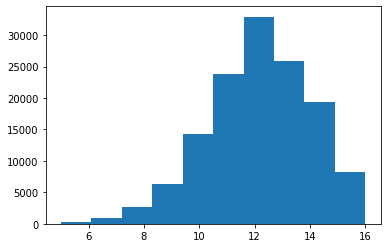

In [102]:
_ = plt.hist(one_hot_train.sum(axis=1))

In [90]:
_ = plt.hist(one_hot_train.sum(axis=1))

array([False, False, False, ..., False, False, False])

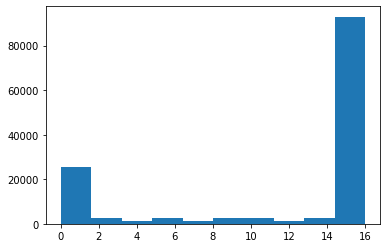

In [88]:
from matplotlib import pyplot as plt
_ = plt.hist(one_hot_train.sum(axis=1))

In [87]:
one_hot_train.shape

(134692, 16)

In [80]:
one_hot_train[-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [45]:
results["v1"]["one_hot"][a_specie].shape

(134692, 16)

In [53]:
with open("rescaling_params_RR.json","w") as fg:
    json.dump(params_RR,fg)

In [10]:
import json

In [54]:
with open("rescaling_params_NN.json","w") as fg:
    json.dump(params,fg)

In [64]:
final_pred_test

array([26.39822153, 26.39822325, 26.39821328, ..., 23.55054368,
       23.55029808, 23.5505181 ])

In [65]:
final_pred.shape

(35289,)

In [66]:
mean_squared_error(final_pred_test,truth_test,squared=False)

0.4737867754160387

In [67]:
mean_squared_error(pred_v2_test.mean(axis=1),truth_test,squared=False)

0.4737867754160387

In [59]:
mean_squared_error(final_pred,truth_test,squared=False)

0.5094365939057868

In [48]:
alpha_v1

2.1666221954826015

In [50]:
gamma_v1

-1.2337890032550534

In [49]:
alpha_v2

1.9385516672672058

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(mean_v1,truth,squared=False)

19.094484483998148

In [16]:
mean_squared_error(results["v2"]["means_test"][6],results["v1"]["test_true"][6],squared=False)

3.8856945291952805

In [17]:
mean_squared_error(results["v1"]["means_test"][6],results["v1"]["test_true"][6],squared=False)

5.808422550843553

In [24]:
a = np.load("./multi_ridge_v2/13C_test_commitee_prediction.npy")

In [25]:
mean_squared_error(np.mean(a,axis=1),results["v1"]["test_true"][6],squared=False)

4.437857324092521

In [65]:
a = np.load("./multi_ridge_v1/specie_1_model_no_1_test_pred.npy")

In [56]:
a.shape

(31446,)

In [57]:
a

array([39.3994998 , 39.40112541, 39.39960339, ..., 23.0001398 ,
       22.99961172, 23.00144591])

In [66]:
mean_squared_error(a,results["v1"]["test_true"][1],squared=False)

1.2168659259406447